# Question 3

In [18]:
# Shaojun Yu
# Mar 30
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pandas
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [19]:
#load data
data = pandas.read_csv('hw2_data_2.txt', sep='\t')
train = data[0:599]
test = data[600:].reset_index(drop=True)
train_X = train.drop(columns=['y'])
train_y = train['y']
test_X = test.drop(columns=['y'])
test_y = test['y']

## preprocessing for SVM
train_X = (train_X - train_X.mean()) / train_X.std()
test_X = (test_X - train_X.mean()) / train_X.std()

### Radial kernel

In [20]:
parameters = {'gamma':[0.0001, 0.001, 0.01, 0.015, 0.1, 0.5]}
svc = SVC(kernel='rbf')
clf = GridSearchCV(svc, parameters, cv=10, 
                   scoring='accuracy', 
                   return_train_score=True)
clf.fit(train_X, train_y)
clf.best_params_

{'gamma': 0.01}

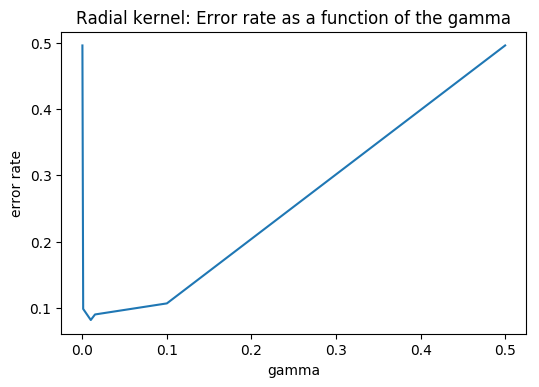

In [21]:
fig = plt.figure(dpi=100)
ax = plt.gca()
ax.plot(parameters['gamma'], 1 - clf.cv_results_['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('error rate')
plt.title('Radial kernel: Error rate as a function of the gamma')
plt.show()

In [22]:
print("Error rate:", end=" ")
print("%.3f" % (1 - clf.score(test_X, test_y)))

Error rate: 0.515


### Sigmoid kernel

In [23]:
parameters = {'gamma':[0.0001, 0.001, 0.01, 0.013, 0.1, 0.5]}
svc = SVC(kernel='sigmoid')
clf = GridSearchCV(svc, parameters, cv=10, 
                   scoring='accuracy', 
                   return_train_score=True)
clf.fit(train_X, train_y)
clf.best_params_

{'gamma': 0.013}

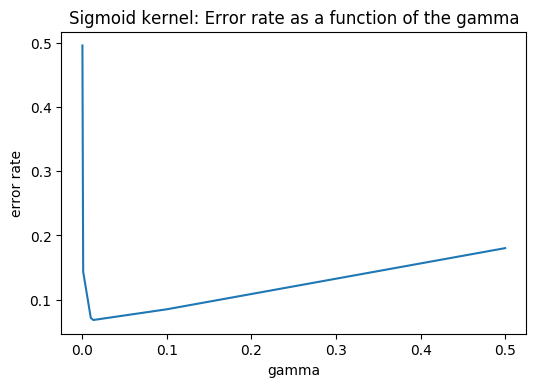

In [24]:
fig = plt.figure(dpi=100)
ax = plt.gca()
ax.plot(parameters['gamma'], 1 - clf.cv_results_['mean_test_score'])
plt.xlabel('gamma')
plt.ylabel('error rate')
plt.title('Sigmoid kernel: Error rate as a function of the gamma')
plt.show()

In [25]:
print("Error rate:", end=" ")
print("%.3f" % (1 - clf.score(test_X, test_y)))

Error rate: 0.420


### Ploy kernel

In [26]:
parameters = {'degree':[1,2,3,4,5,9]}
svc = SVC(kernel='poly')
clf = GridSearchCV(svc, parameters, cv=10, 
                   scoring='accuracy', 
                   return_train_score=True)
clf.fit(train_X, train_y)
clf.best_params_

{'degree': 1}

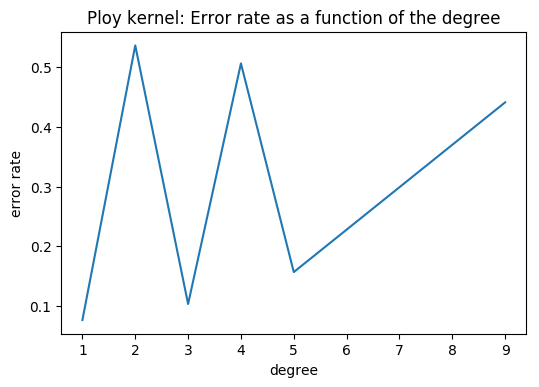

In [27]:
fig = plt.figure(dpi=100)
ax = plt.gca()
ax.plot(parameters['degree'], 1 - clf.cv_results_['mean_test_score'])
plt.xlabel('degree')
plt.ylabel('error rate')
plt.title('Ploy kernel: Error rate as a function of the degree')
plt.show()

In [28]:
print("Error rate:", end=" ")
print("%.3f" % (1 - clf.score(test_X, test_y)))

Error rate: 0.480
